<h2> Linear regression model for testing governance decisions </h2>

<h4>The problem that arises is to provide a model against which government officials can check their future decisions.</h4>

<h5>Problems to solve:
<ol>
   <li>How well do the variables chosen in the project explain the variation in the resulting variable, governance effectiveness?</li>
   <li>What is the project error?</li>
   <li>To what extent can only one of the independent variables with a strong positive correlation influence the dependent variable, governance effectiveness.</li>
   <li>How to check the model over time, if it needs updates or retrain?.</li>
   <li>How to retrain the model?</li>
</ol>
</h5>

In [1158]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

<h3>Gather the data</h3>

The data is obtained from the World Bank website, at https://databank.worldbank.org/. After filtering by 'Social development', a database in .csv format is obtained, which will be processed for the project.

In [1161]:
governance = pd.read_csv('Governance_Data_M2.csv')

In [1162]:
# We will view the first seven rows in the database
governance.head(7)

,CC.EST,GE.EST,PV.EST,RL.EST,RL.NO.SRC,RQ.EST,VA.EST
0,-1.493361,-1.611539,-2.702721,-1.831407,10,-1.389163,-1.078267
1,-0.935061,-1.257485,-0.599918,-0.951059,10,-0.856853,-0.816006
2,0.632067,0.911797,1.503843,0.373448,1,0.930366,0.000000
3,-0.573539,-0.155121,0.088613,-0.378028,10,0.221967,0.086325
4,1.265454,1.749241,1.588675,1.615182,1,1.335421,1.085335
5,1.083614,1.285267,0.592605,0.875136,9,1.074331,-1.178066
6,-0.163570,-0.254262,-0.071997,-0.486266,13,-0.498344,0.584501


In this visualization we see that the data respects the variation limits provided in the metadata. These data are already standardized.

<h3>Assess and clean the data</h3>

In [1165]:
governance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CC.EST     211 non-null    float64
 1   GE.EST     211 non-null    float64
 2   PV.EST     211 non-null    float64
 3   RL.EST     211 non-null    float64
 4   RL.NO.SRC  211 non-null    int64  
 5   RQ.EST     211 non-null    float64
 6   VA.EST     211 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.7 KB



From the previous .info() method we see that we do not have null variables and they are of type float and integer, we do not have objects that should be converted to integer. There are 211 rows corresponding to 211 countries from which the data comes. 

<h4>Missing Values Analysis:</h4>

If there were null data for all variables, these records should be deleted.Given that the data are already standardized, they generally vary in intervals, for example (-2.5 to 2.5) there may be zero values, but it is impossible for all variables to have exactly zero value, this means lck of data. For the accuracy of the model it is good not to make any imputation, especially since the number of records is relatively small, being the number of countries taken in the research.

<h3>Analyse the data</h3>

In [1170]:
governance.shape

(211, 7)

In [1171]:
governance.describe()

,CC.EST,GE.EST,PV.EST,RL.EST,RL.NO.SRC,RQ.EST,VA.EST
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,-0.003739,-0.004213,-0.004797,-0.005136,8.781991,-0.004109,-0.003265
std,0.996164,0.997153,0.999963,0.996052,3.583010,0.997991,0.988031
min,-1.936870,-2.362375,-2.711848,-2.331935,0.000000,-2.370466,-2.155002
25%,-0.770222,-0.720229,-0.597122,-0.713041,7.000000,-0.761328,-0.821545
50%,-0.122199,-0.079083,0.088613,-0.106093,10.000000,-0.024793,0.047348
75%,0.677260,0.710892,0.863447,0.672964,11.000000,0.779391,0.871508
max,2.236486,2.284203,1.910595,2.018592,14.000000,2.205299,1.720227


The describe() method calculates various statistical measures such as count, mean, standard deviation, minimum, maximum, and percentiles for numerical columns. It also provides summary statistics for columns with object data types. Data are already standardized.

We will visualize the distribution of the variables. Given that the data is already standardized, the variables follow a normal distribution.

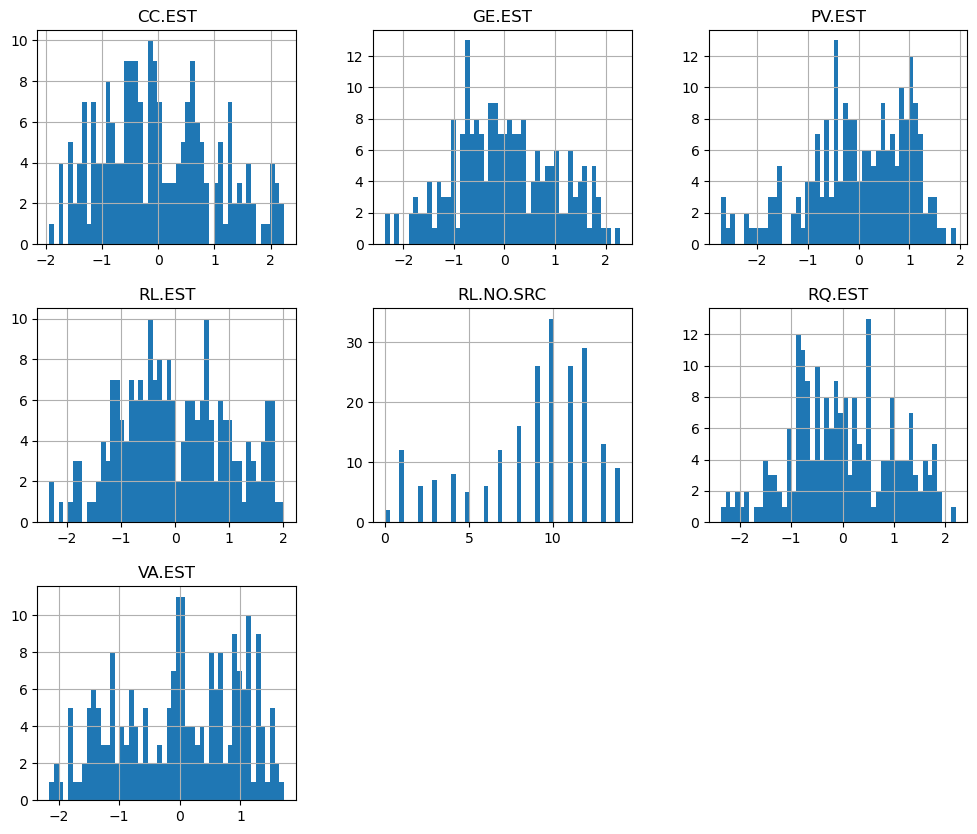

In [1174]:
# plot hystograms of the feathures with matplotlibto see their distributions
governance.hist(bins=50, figsize=(12, 10))
plt.show()

<h3>Develop the model </h3>

In [1176]:
# Calculate the correlation matrix of the features
corr_matrix = governance.corr()

In [1177]:
# Set the target, or the y variable

y = governance['GE.EST']

In [1178]:
# Print the correlation matrix sorted by linear correlation with the target
corr_matrix["GE.EST"].sort_values(ascending=False)

GE.EST       1.000000
RL.EST       0.935045
RQ.EST       0.927740
CC.EST       0.915665
PV.EST       0.753005
VA.EST       0.707461
RL.NO.SRC   -0.300655
Name: GE.EST, dtype: float64

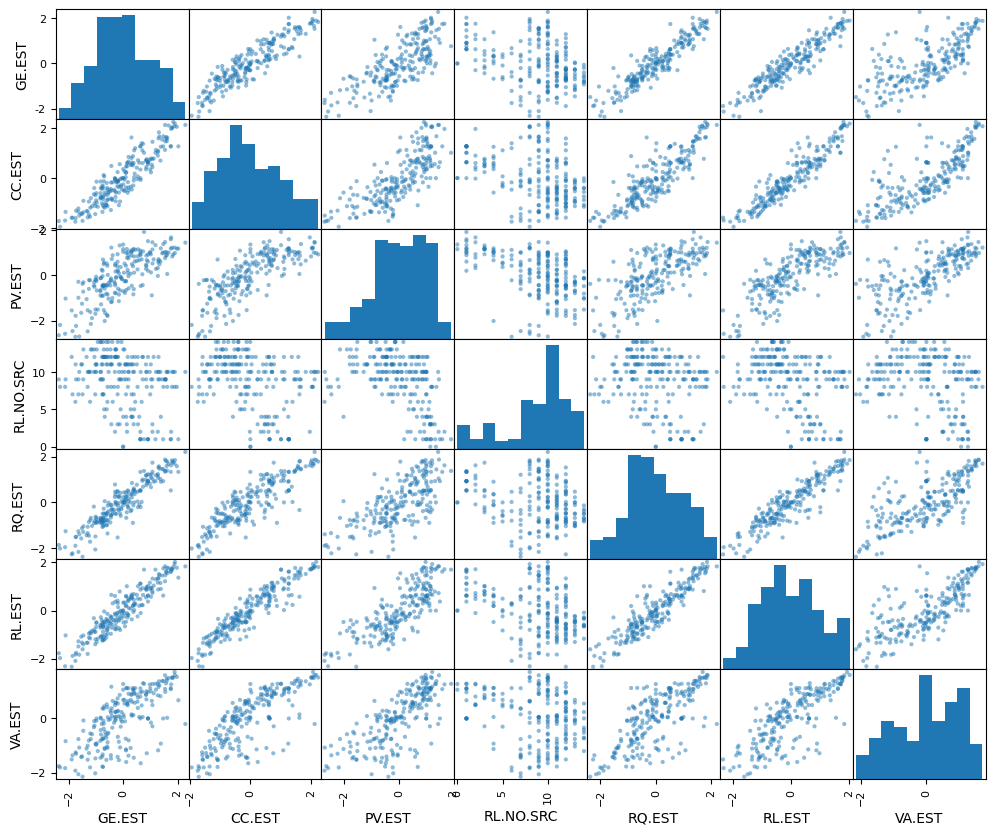

In [1179]:
# Plot the most important feature pairs with a scatter plot
from pandas.plotting import scatter_matrix
features =["GE.EST", "CC.EST", "PV.EST", "RL.NO.SRC", "RQ.EST", "RL.EST", "VA.EST"]
scatter_matrix(governance[features], figsize = (12, 10))
plt.show()

From the scatter plots, a linear correlation is observed for all variables. .

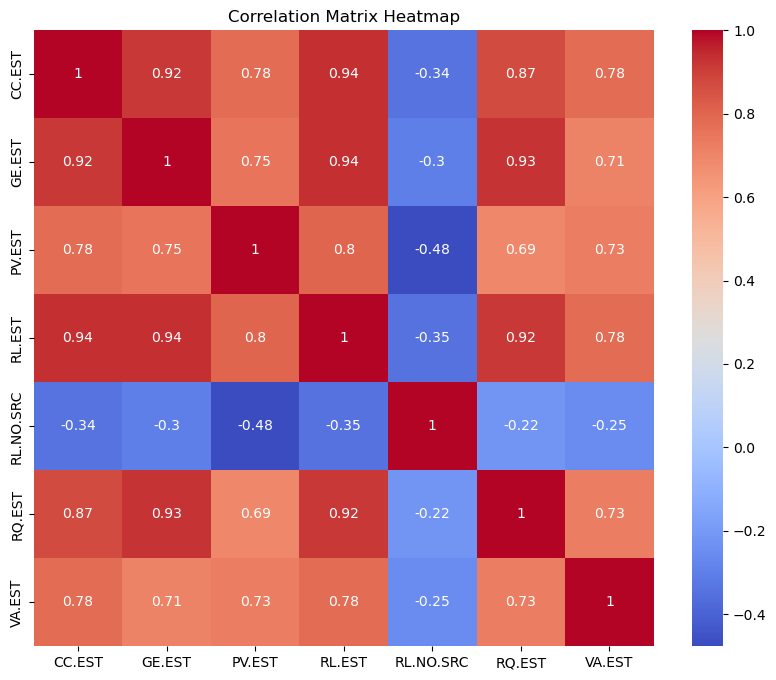

In [1181]:
# Plot heatmap of the correlation matrix 
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Except for one variable that has a negative correlation, colored in blue, all other variables have positive correlations

<h5>Given the linear correlation present in the diagrams, we will choose a linear regression model.</h5>

<h3>Training the model</h3>

In [1185]:
# Set the independent variable matrix, X

X = governance.drop('GE.EST', axis=1)

In [1186]:
# create your train-test splits
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [1187]:
# instantiate
# this creates a linear regression object that we can train and score
lr = LinearRegression()

In [1188]:
# Train the model with the correct data set

lr.fit(X_train,y_train)

LinearRegression()

<h3>Evaluate the model</h3>

In [1190]:
# use .score(). Recall this returns the default scoring method, which, for linear regression is r^2.

train_r2 = lr.score(X_train,y_train)
print(f'training r^2: {train_r2}')

training r^2: 0.9223930941675436


<h5> The answer to problem 1:</h4>

An R² value of 0.92 means that 92% of the variance in the dependent variable (government effectiveness) can be explained by the independent variables (features) chosen in this model. This indicates a strong fit.


We will evaluate the model on the test dataset. We will make predictions and calculate the RMSE


In [1194]:
# Get predictions

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(y_test_pred[:5].round(4))

[-1.3428 -0.855   0.5273 -0.9396  0.6046]


In [1195]:
# Compare the predictions with the actual values
print(y_test[:5].values)

[-1.34236813 -0.57112867  0.83944851 -0.81017447  0.7167384 ]


In [1196]:
# Calculate the relative error of these predictions
relative_errors = np.abs(y_test_pred - y_test)/y_test*100
print("Relative errors in per cent: ", relative_errors[:5].values)

Relative errors in per cent:  [-2.99787087e-02 -4.97041110e+01  3.71873578e+01 -1.59771820e+01
  1.56432390e+01]


In [1197]:
# Use y_pred and y with the mean squared error method

train_mse = mean_squared_error(y_train, y_train_pred)
print(f'training MSE: {train_mse}')

training MSE: 0.07669767795467416


In [1198]:
# use a better metric

train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_rmse


0.2769434562409341

In [1199]:
# Score with test data

test_r2 = lr.score(X_test, y_test)
print(f'testing r^2: {test_r2}')

testing r^2: 0.9067601947105424


An testing R² value of 0.916, the same like trainig R² means the model is not overfitting. The values of training coeficient is not much greater than testing coeficient, in this case almost the same. This means the training model learn the pattern , not the noise.

In [1201]:
# Get the RMSE for the test set

y_test_pred = lr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'testing RMSE: {test_rmse}')

testing RMSE: 0.29387241045360907


<h5>The answer to problem 2:</h5>

RMSE is a valuable metric for assessing the performance of regression models.
It gives a a measure of how far off our predictions are on average, or in other words provides a clear indication of the average prediction error.
Training RMSE = 0.21, testing RMSE = 0.27, we consider acceptable errors for the GE.EST wich ranging from approximately -2.5 to 2.5 (standard units, look at the Metadata file).

Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements, to be able to view the model.

In [1205]:
# Train a simple linear regression model with only one feature for comparison
X_train_CCEST = X_train[['CC.EST']]
X_test_CCEST = X_test[['CC.EST']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_CCEST, y_train)

LinearRegression()

In [1206]:
 # Score with train data

train_r2 = simple_linear_model.score(X_train_CCEST,y_train)
print(f'training r^2: {train_r2}')

training r^2: 0.8358469512901046


In [1207]:
# Score with test data

test_r2 = simple_linear_model.score(X_test_CCEST, y_test)
print(f'testing r^2: {test_r2}')

testing r^2: 0.8301570918297013


<h4> Answer to question 3: </h4>

<h5>The variable CC_EST - corruption control determines 81% of the variation in the dependent variable, governance effectiveness.</h5>

In [1210]:
# Make predictions on the training and test set
simple_predictions_train = simple_linear_model.predict(X_train_CCEST)
simple_predictions_test = simple_linear_model.predict(X_test_CCEST)

In [1211]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rmse_train)
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rmse_test)

0.4027776837641258
0.3966266072738831


We consider a root mean squared error of 0.45 acceptable for a range (-2.5-2.5) of variation of the governance effectiveness variable. You can also see in the figure that the test variables are grouped quite tightly around the red line which represents the model prediction.

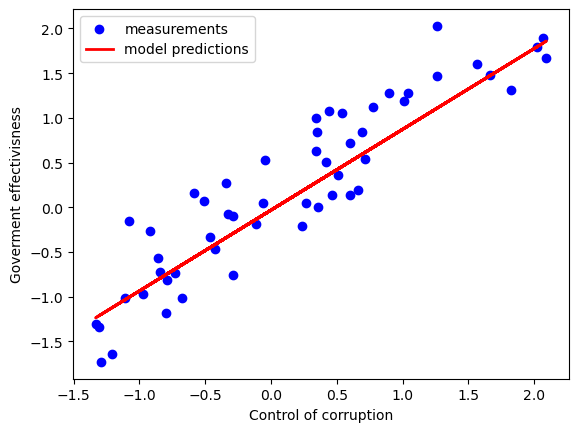

In [1213]:
# Plot the simple linear regression model
plt.scatter(X_test_CCEST, y_test, color='blue', label='measurements')
plt.plot(X_test_CCEST, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel("Control of corruption")
plt.ylabel("Goverment effectivisness")
plt.legend(loc="upper left")
plt.show()


You can see in the figure above that the test variables for Government effectiveness are grouped quite tightly around the red line which represents the model prediction corresponding to the independent variable Control of corruption

In [ ]:
We will create a function to train the model for each independent variable. The user will need to type the name of the column that contains the independent variable.

The column name will be placed in quotation marks.
An example name_col = "CC.EST"

In [1217]:
def train_liniar_regression(X, y, name_col, test_size=0.2, random_state=42):
    name_col = name_col
    # Train another simple linear regression model with other feature for comparison
    # Împărțim datele
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train_one = X_train[[name_col]]
    X_test_one = X_test[[name_col]]
                   
    # Creăm și antrenăm modelul
    model = LinearRegression()
    model.fit(X_train_one, y_train)

    simple_predictions_test = model.predict(X_test_one)

    # Evaluăm modelul
    scor = model.score(X_test_one, y_test) # R^2

    print(f"Coeficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Scor R^2 for test_set {scor:.4f}")

    return model, scor       
    

We will create a function for visuaization of each variable

In [1219]:
def visualize_scatter(X_test_one, y, color='blue', label='measurements'):  

    X_train_one = X_train[[name_col]]
    X_test_one = X_test[[name_col]]
    simple_linear_model = LinearRegression()
    simple_linear_model.fit(X_train_one, y_train)

    simple_predictions_test = simple_linear_model.predict(X_test_one)
    
    plt.scatter(X_test_one, y_test, color='blue', label='measurements')
    plt.plot(X_test_one, simple_predictions_test, color='red', linewidth=2, label='model predictions')
    plt.xlabel(name_col)
    plt.ylabel("Government Effectiveness")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [1220]:
# We will enter the column name, will be placed in quotation marks.
name_col = "VA.EST"

In [1221]:
train_liniar_regression(X, y, name_col)

Coeficient: 0.7288
Intercept: 0.0472
Scor R^2 for test_set 0.4629


(LinearRegression(), 0.4629394694141057)

We can see from the R^2 coefficient that the independent variable VA.EST explains only 46% of the variation in the dependent variable Governance Effectiveness.

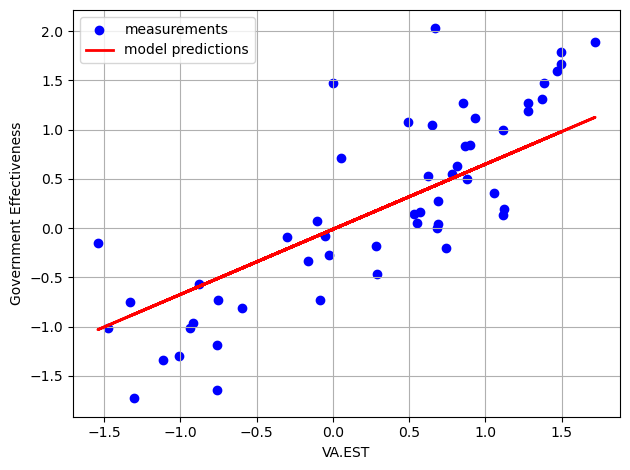

In [1223]:
visualize_scatter(X_test_one, y, name_col)

We can see from this figure that the the points move away from the red model prediction line at the bottom, which is consistent with the lower value of R2.

<h4>Answer to question 4: </h4>


The model will need to be revised if the R² (R-squared) value falls below 0.70. This would mean that the model reflects only 70% of the variation in the variable of governance efficiency. Also, if we find that the initial distribution of the independent variables changed or prediction goals have changed. 

<h4>Answer to question 5: </h4>


We can train a new model or update existing model with the new data, especially if new data from sources emerge. Evaluate the performance again and then deploy the model.